# Build dataset from all market data

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import warnings
from IPython.display import Image

![Dataset Timeline](media/individual_datasets_DE_timeline.png)
<!--  Image("media/individual_datasets_DE_timeline.png") -->

- DA
    - DA 60min - DE-AT-LU (ENTSO-e)
    - DA 60min - DE-LU (ENTSO-e)
    - DA 15min - DE-LU (ENTSO-e)
- ID
    - IP-index (netztransparenz)
- FCR
    - Procurement price 1W (SMARD)
    - Procurement price 24h (SMARD)
    - Procurement price 4h (SMARD)
- aFRR cap
    - Cost of capacity 12h (SMARD)
    - Cost of capacity 4h (SMARD)
- aFRR en
    - Cost of activation 15min (SMARD)

## Day-ahead markets

In [60]:
def clean_ENTSOE_data(path, colname, areacode):
    """Reads all csv files in a directory and concatenates them into a single dataframe.
    Drops rows with no currency, sets index to datetime, drops duplicate indexes, drops rows with nans and drop area code column.
    Returns a dataframe with the specified column name"""
    df = pd.DataFrame()
    dirlist = os.listdir(path)
    for i in dirlist:
        if i.endswith(".csv"):
            df_int = pd.read_csv(path + i)
            # print(df_int)
            # df_int.dropna(subset=['Currency'], inplace=True) # Drop rows with no currency
            if len(df_int) != 0: #If there's still rows
                df_int.set_index('MTU (CET/CEST)', inplace=True) 
                df_int.index = pd.to_datetime(df_int.index.str.slice(0,16), format="%d.%m.%Y %H:%M") # Set index to datetime
                
                # Convert all non numbers and dots to nans
                df_int[df_int.columns[0]] = df_int[df_int.columns[0]].replace('^[^0-9.]+$', np.nan, regex=True).astype(float)
                df_int = df_int[~df_int.index.duplicated(keep='first')] # Drop duplicate indexes

                df = pd.concat([df,df_int]) # Concatenate to main dataframe
    df.drop(columns=[areacode, 'Currency'], inplace=True)
    df.rename(columns={'Day-ahead Price [EUR/MWh]': colname}, inplace=True)
    df.sort_index(inplace=True) # Sort index
    # df.dropna(inplace=True) # Drop rows with nans
    return df


ENTSOE_DE_DATA_dir = "../../20_data/entsoe_data/DE"
DA_60min_DEATLU_subdir = "/DA_60min/DE-AT-LU/" # 'BZN|DE-AT-LU'
DA_60min_DELU_subdir = "/DA_60min/DE-LU/" # 'BZN|DE-LU'
DA_15min_DELU_subdir = "/DA_15min/DE-LU/" # 'BZN|DE-LU'

df_DA_60min_DEATLU = (clean_ENTSOE_data(ENTSOE_DE_DATA_dir + DA_60min_DEATLU_subdir, 'DA_60min_DEATLU', 'BZN|DE-AT-LU'))
# print(df_DA_60min_DEATLU.index.min(), df_DA_60min_DEATLU.index.max())

df_DA_60min_DELU = (clean_ENTSOE_data(ENTSOE_DE_DATA_dir + DA_60min_DELU_subdir, 'DA_60min_DELU', 'BZN|DE-LU'))
# print(df_DA_60min_DELU.index.min(), df_DA_60min_DELU.index.max())

df_DA_15min_DELU = (clean_ENTSOE_data(ENTSOE_DE_DATA_dir + DA_15min_DELU_subdir, 'DA_15min_DELU', 'BZN|DE-LU')) 
# print(df_DA_15min_DELU.index.min(), df_DA_15min_DELU.index.max())

df_DA = (pd.concat([ df_DA_60min_DEATLU, df_DA_60min_DELU, df_DA_15min_DELU])).sort_index()
df_DA = df_DA.groupby(df_DA.index).first() # Combine duplicate indexes (15min and 60min intervals)
df_DA

/var/folders/28/cmh8kslx4f9gr_zckx5qp_sw0000gn/T/ipykernel_25459/3601764567.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_int[df_int.columns[0]] = df_int[df_int.columns[0]].replace('^[^0-9.]+$', np.nan, regex=True).astype(float)
/var/folders/28/cmh8kslx4f9gr_zckx5qp_sw0000gn/T/ipykernel_25459/3601764567.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_int[df_int.columns[0]] = df_int[df_int.columns[0]].replace('^[^0-9.]+$', np.nan, regex=True).astype(float)
/var/folders/28/cmh8kslx4f9gr_zckx5qp_sw0000gn/T/ipykernel

,Day-ahead Price [Currency/MWh],DA_60min_DEATLU,DA_60min_DELU,DA_15min_DELU
MTU (CET/CEST),,,,
2014-01-01 00:00:00,NaN,NaN,NaN,NaN
2014-01-01 00:15:00,NaN,NaN,NaN,NaN
2014-01-01 00:30:00,NaN,NaN,NaN,NaN
2014-01-01 00:45:00,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-12-31 22:45:00,NaN,NaN,NaN,NaN
2024-12-31 23:00:00,NaN,NaN,NaN,NaN
2024-12-31 23:15:00,NaN,NaN,NaN,NaN


## Intra-day markets

In [75]:
netztransparenz_DATA_dir = "../../20_data/netztransparenz"
IP_index = "/IP_index/Index Ausgleichsenergiepreis [2024-10-11 17-44-33].csv" 
df_IP_index = pd.read_csv(netztransparenz_DATA_dir + IP_index, sep=";") # Import csv

# Set datetime index
df_IP_index.index = pd.to_datetime(df_IP_index['Datum von'] + " " + df_IP_index['(Uhrzeit) von'], format="%d.%m.%Y %H:%M")

# Drop columns and rename
df_IP_index.drop(columns=(df_IP_index.columns.difference(['ID AEP in €/MWh'])), inplace=True)
df_IP_index.rename(columns={'ID AEP in €/MWh': 'IP_index'}, inplace=True)

# Change comma to dot and convert to float
df_IP_index['IP_index'] = df_IP_index['IP_index'].replace(',', '.', regex=True).astype(float)

df_IP_index = df_IP_index[~df_IP_index.index.duplicated(keep='first')]
 
df_IP_index

,IP_index
2020-07-01 00:00:00,43.75
2020-07-01 00:15:00,37.76
2020-07-01 00:30:00,26.63
2020-07-01 00:45:00,20.38
2020-07-01 01:00:00,33.22
...,...
2024-10-10 22:45:00,115.49
2024-10-10 23:00:00,114.59
2024-10-10 23:15:00,97.92
2024-10-10 23:30:00,99.21


## FCR

### SMARD data

Frequency_Containment_Reserve_201501010000_202101010000_Quarterhour.csv
Frequency_Containment_Reserve_202101010000_202501010000_Quarterhour.csv


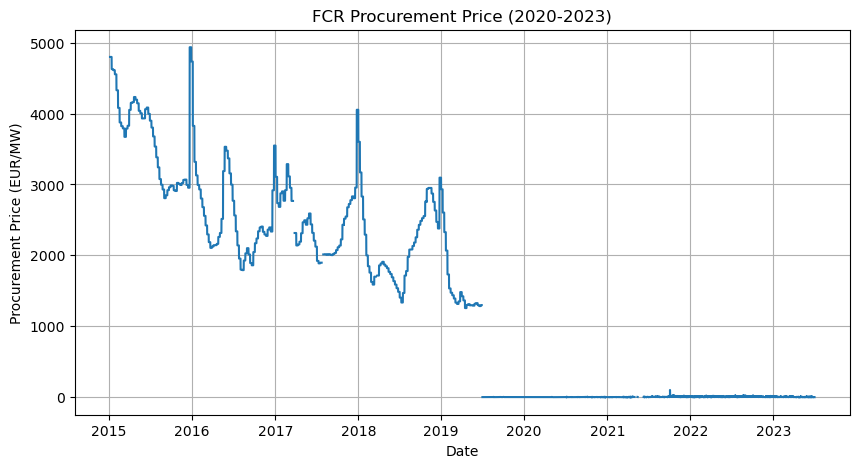

In [81]:
# SMARD import
SMARD_dir = "../../20_data/SMARD"
FCR_subdir = "/FCR/"

df_FCR = pd.DataFrame()
dirlist = os.listdir(SMARD_dir + FCR_subdir)
for i in dirlist:
    if i.endswith(".csv"):
        print(i)
        df_int = pd.read_csv(SMARD_dir + FCR_subdir + i, sep=";")
        df_int.set_index('Start date', inplace=True)
        df_int.index = pd.to_datetime(df_int.index, format="%b %d, %Y %I:%M %p")
        df_int.drop(columns=['End date'], inplace=True)
        df_int.rename(columns={'Volume procured [MW] Original resolutions': 'volume_procured_MW', 'Procurement price [€/MW] Original resolutions': 'procurement_price_EUR_MW'}, inplace=True)
        df_int = df_int.replace(',', '', regex=True)
        df_int = df_int.replace('^[^0-9.]+$', np.nan, regex=True).astype(float)
        df_FCR = pd.concat([df_FCR,df_int]) # Concatenate to main dataframe
df_FCR.sort_index(inplace=True) # Sort index
df_FCR = df_FCR[~df_FCR.index.duplicated(keep='first')]

# df_FCR.dropna(inplace=True) # Drop rows with nans
#df_FCR.to_csv('fcr.csv')
plt.figure(figsize=(10, 5))
plt.plot(df_FCR.index, df_FCR['procurement_price_EUR_MW'])
# plt.xlim(pd.Timestamp('2019-05-01'), pd.Timestamp('2023-01-01'))
# plt.ylim(0, 1000)
plt.xlabel('Date')
plt.ylabel('Procurement Price (EUR/MW)')
plt.title('FCR Procurement Price (2020-2023)')
plt.grid(True)
plt.show()

### Regelleistung data

In [5]:
# Regelleistung, starting July 2019, 24h
regelleistung_dir = "../../20_data/regelleistung"
FCR_subdir = "/FCR/"

df_FCR = pd.DataFrame()
dirlist = os.listdir(regelleistung_dir + FCR_subdir)

df_FCR = pd.DataFrame()
for i in dirlist:
    if i.endswith(".xlsx"):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            df_int = pd.read_excel(regelleistung_dir + FCR_subdir + i)
        df_int['period_start'] = df_int['DATE_FROM'] + pd.to_timedelta(df_int['PRODUCTNAME'].apply(lambda x: x.split("_")[1] + ":00:00"))
        df_int['FCR length'] = df_int['PRODUCTNAME'].apply(lambda x: '1D' if x[7:12] == "00_24" else '4h')
        print(i)
        if 'DE_SETTLEMENTCAPACITY_PRICE_[EUR/MW]' in df_int.columns:
            df_int['settled price [EUR/MW]'] = df_int['DE_SETTLEMENTCAPACITY_PRICE_[EUR/MW]']
        else:
            df_int['settled price [EUR/MW]'] = df_int['GERMANY_SETTLEMENTCAPACITY_PRICE_[EUR/MW]']
        df_int.drop(columns=df_int.columns.difference(['period_start', 'FCR length', 'settled price [EUR/MW]']), inplace=True)
        df_int.set_index('period_start', inplace=True)
        df_FCR = pd.concat([df_FCR,df_int]) # Concatenate to main dataframe
df_FCR.sort_index(inplace=True) # Sort index
print(df_FCR)

RESULT_OVERVIEW_CAPACITY_MARKET_FCR_2021-01-01_2021-12-31.xlsx
RESULT_OVERVIEW_CAPACITY_MARKET_FCR_2020-01-01_2020-12-31.xlsx
RESULT_OVERVIEW_CAPACITY_MARKET_FCR_2022-01-01_2022-12-31.xlsx
RESULT_OVERVIEW_CAPACITY_MARKET_FCR_2023-01-01_2023-12-31.xlsx
RESULT_OVERVIEW_CAPACITY_MARKET_FCR_2019-01-01_2019-12-31.xlsx
                    FCR length settled price [EUR/MW]
period_start                                         
2019-07-01 00:00:00         1D                  180.0
2019-07-02 00:00:00         1D                 175.12
2019-07-03 00:00:00         1D                  328.0
2019-07-04 00:00:00         1D                 242.64
2019-07-05 00:00:00         1D                  193.4
...                        ...                    ...
2023-12-31 04:00:00         4h                  92.83
2023-12-31 08:00:00         4h                   59.7
2023-12-31 12:00:00         4h                     54
2023-12-31 16:00:00         4h                  68.59
2023-12-31 20:00:00         4h       

## aFRR

### SMARD

Automatic_Frequency_Restoration_Reserve_202101010000_202501010000_Quarterhour.csv


/var/folders/28/cmh8kslx4f9gr_zckx5qp_sw0000gn/T/ipykernel_25459/993523773.py:19: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_int = pd.read_csv(SMARD_dir + aFRR_subdir + i, sep=";")


Automatic_Frequency_Restoration_Reserve_201501010000_202101010000_Quarterhour.csv


/var/folders/28/cmh8kslx4f9gr_zckx5qp_sw0000gn/T/ipykernel_25459/993523773.py:19: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_int = pd.read_csv(SMARD_dir + aFRR_subdir + i, sep=";")


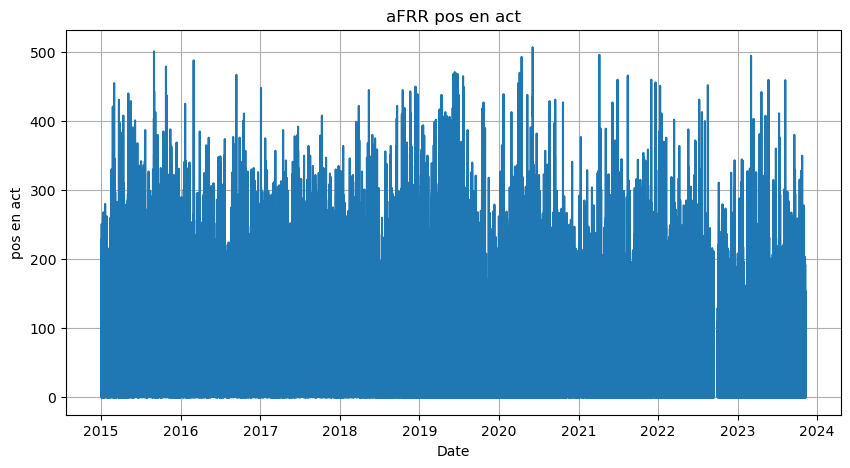

In [88]:
columns_SMARD_aFRR = ['Volume activated (+) [MWh] Original resolutions',
       'Volume activated (-) [MWh] Original resolutions',
       'Activation price (+) [€/MWh] Original resolutions',
       'Activation price (-) [€/MWh] Original resolutions',
       'Volume procured (+) [MW] Original resolutions',
       'Volume procured (-) [MW] Original resolutions',
       'Procurement price (+) [€/MW] Original resolutions',
       'Procurement price (-) [€/MW] Original resolutions']

# SMARD import
SMARD_dir = "../../20_data/SMARD"
aFRR_subdir = "/aFRR/"

df_aFRR = pd.DataFrame()
dirlist = os.listdir(SMARD_dir + aFRR_subdir)
for i in dirlist:
    if i.endswith(".csv"):
        print(i)
        df_int = pd.read_csv(SMARD_dir + aFRR_subdir + i, sep=";")
        df_int.set_index('Start date', inplace=True)
        df_int.index = pd.to_datetime(df_int.index, format="%b %d, %Y %I:%M %p")
        df_int.drop(columns=['End date'], inplace=True)
        df_int.rename(columns={'Volume activated (+) [MWh] Original resolutions':'aFRR_en_pos',
        'Volume activated (-) [MWh] Original resolutions':'aFRR_en_neg',
        'Activation price (+) [€/MWh] Original resolutions':'aFRR_en_price_pos',
        'Activation price (-) [€/MWh] Original resolutions':'aFRR_en_price_neg',
        'Volume procured (+) [MW] Original resolutions':'aFRR_cap_pos',
        'Volume procured (-) [MW] Original resolutions':'aFRR_cap_neg',
        'Procurement price (+) [€/MW] Original resolutions':'aFRR_cap_price_pos',
        'Procurement price (-) [€/MW] Original resolutions':'aFRR_cap_price_neg'}, inplace=True)
        df_int = df_int.replace(',', '', regex=True)
        df_int = df_int.replace('^[^0-9.]+$', np.nan, regex=True).astype(float)
        df_aFRR = pd.concat([df_aFRR,df_int]) # Concatenate to main dataframe
df_aFRR.sort_index(inplace=True) # Sort index
df_aFRR = df_aFRR[~df_aFRR.index.duplicated(keep='first')]
#df_aFRR.dropna(inplace=True) # Drop rows with nans
# #df_FCR.to_csv('fcr.csv')
plt.figure(figsize=(10, 5))
plt.plot(df_aFRR.index, df_aFRR['aFRR_en_pos'])
# plt.xlim(pd.Timestamp('2019-05-01'), pd.Timestamp('2023-01-01'))
# plt.ylim(0, 1000)
# plt.xlabel('Date')
# plt.ylabel('pos en act')
# plt.title('aFRR pos en act')
# plt.grid(True)
# plt.show()

## Join

In [109]:
combined_df = pd.concat([df_IP_index,df_aFRR,df_FCR,df_DA],axis=1) #df_DA not overlapping
combined_df.dropna().index.max()- combined_df.dropna().index.min()

NaT

In [110]:
combined_df.dtypes

IP_index                          float64
aFRR_en_pos                       float64
aFRR_en_neg                       float64
aFRR_en_price_pos                 float64
aFRR_en_price_neg                 float64
aFRR_cap_pos                      float64
aFRR_cap_neg                      float64
aFRR_cap_price_pos                float64
aFRR_cap_price_neg                float64
volume_procured_MW                float64
procurement_price_EUR_MW          float64
Day-ahead Price [Currency/MWh]    float64
DA_60min_DEATLU                   float64
DA_60min_DELU                     float64
DA_15min_DELU                     float64
dtype: object

In [100]:
combined_df[pd.to_datetime('2020-01-01'):pd.to_datetime('2020-01-02')]

,IP_index,aFRR_en_pos,aFRR_en_neg,aFRR_en_price_pos,aFRR_en_price_neg,aFRR_cap_pos,aFRR_cap_neg,aFRR_cap_price_pos,aFRR_cap_price_neg,volume_procured_MW,procurement_price_EUR_MW,Day-ahead Price [Currency/MWh],DA_60min_DEATLU,DA_60min_DELU,DA_15min_DELU
2020-01-01 00:00:00,NaN,15.0,11.0,56.97,-5.36,2044.0,2179.0,0.00,1.67,576.0,1.55,NaN,NaN,41.88,44.24
2020-01-01 00:15:00,NaN,9.0,9.0,55.66,-5.81,2044.0,2179.0,0.00,1.67,576.0,1.55,NaN,NaN,NaN,35.58
2020-01-01 00:30:00,NaN,6.0,3.0,55.00,-6.92,2044.0,2179.0,0.00,1.67,576.0,1.55,NaN,NaN,NaN,22.79
2020-01-01 00:45:00,NaN,0.0,6.0,55.00,-6.57,2044.0,2179.0,0.00,1.67,576.0,1.55,NaN,NaN,NaN,9.36
2020-01-01 01:00:00,NaN,12.0,3.0,56.09,-6.93,2044.0,2179.0,0.00,1.67,576.0,1.55,NaN,NaN,38.60,41.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01 23:00:00,NaN,3.0,1.0,55.00,-14.86,2071.0,2139.0,0.05,0.05,576.0,1.55,NaN,NaN,34.85,44.72
2020-01-01 23:15:00,NaN,19.0,1.0,61.58,-14.98,2071.0,2139.0,0.05,0.05,576.0,1.55,NaN,NaN,NaN,39.12
2020-01-01 23:30:00,NaN,9.0,3.0,56.02,-14.22,2071.0,2139.0,0.05,0.05,576.0,1.55,NaN,NaN,NaN,24.17
2020-01-01 23:45:00,NaN,1.0,18.0,55.00,-11.20,2071.0,2139.0,0.05,0.05,576.0,1.55,NaN,NaN,NaN,6.21


IndexError: index 0 is out of bounds for axis 0 with size 0

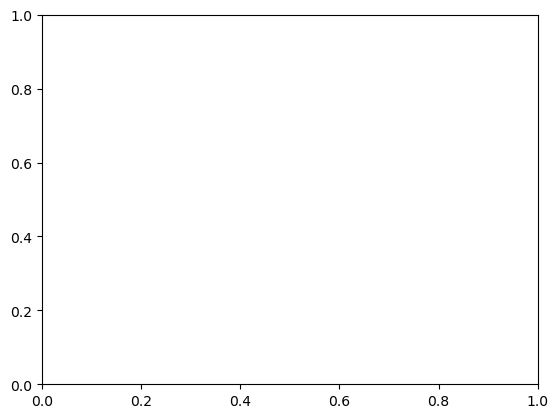

In [97]:
ax = combined_df.dropna().plot()
ax.legend([])
ax.set_xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2024-01-01'))
ax.set_ylim(-1000, 4000)